Q.1 Pre-Process the dataset by handling missing values and normalizing the data. Split in the
ratio 70:20:10 for train-test-validation. [10 Marks]

In [43]:
# importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [44]:
# load txt file
df = pd.read_csv('data_banknote_authentication.txt', header=None)

In [45]:
df

,0,1,2,3,4
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [46]:
# rename the columns of the dataframe as variance, skewness, curtosis, entropy, class
df.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [47]:
# preprocessing the data
# check for null values
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [48]:
# normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['variance', 'skewness', 'curtosis', 'entropy']] = scaler.fit_transform(df[['variance', 'skewness', 'curtosis', 'entropy']])
df

,variance,skewness,curtosis,entropy,class
0,1.121806,1.149455,-0.975970,0.354561,0
1,1.447066,1.064453,-0.895036,-0.128767,0
2,1.207810,-0.777352,0.122218,0.618073,0
3,1.063742,1.295478,-1.255397,-1.144029,0
4,-0.036772,-1.087038,0.736730,0.096587,0
...,...,...,...,...,...
1367,-0.009711,-0.097693,-0.660962,0.300996,1
1368,-0.641313,-1.158984,1.179023,0.730127,1
1369,-1.472357,-2.621646,3.759017,-0.754884,1
1370,-1.406693,-1.756471,2.552043,-0.043158,1


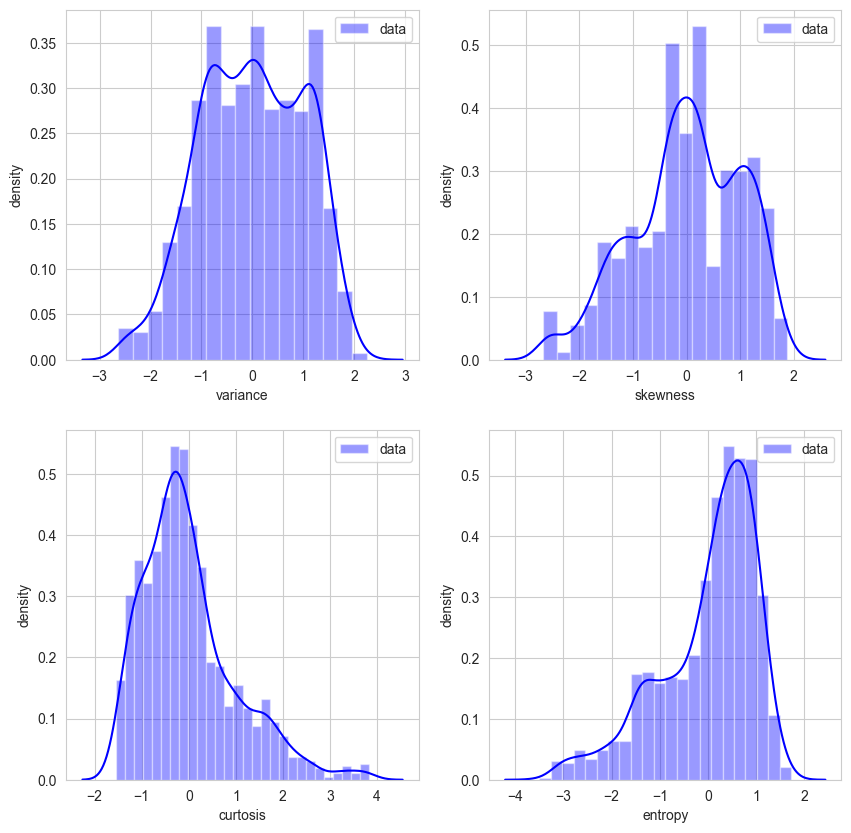

In [49]:
# visualize the data using histogram along with KDE plot
plt.figure(figsize=(10, 10))
for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.distplot(df[feature], kde=True, color='blue', label='data')
    plt.xlabel(feature)
    plt.ylabel('density')
    plt.legend()
plt.show()

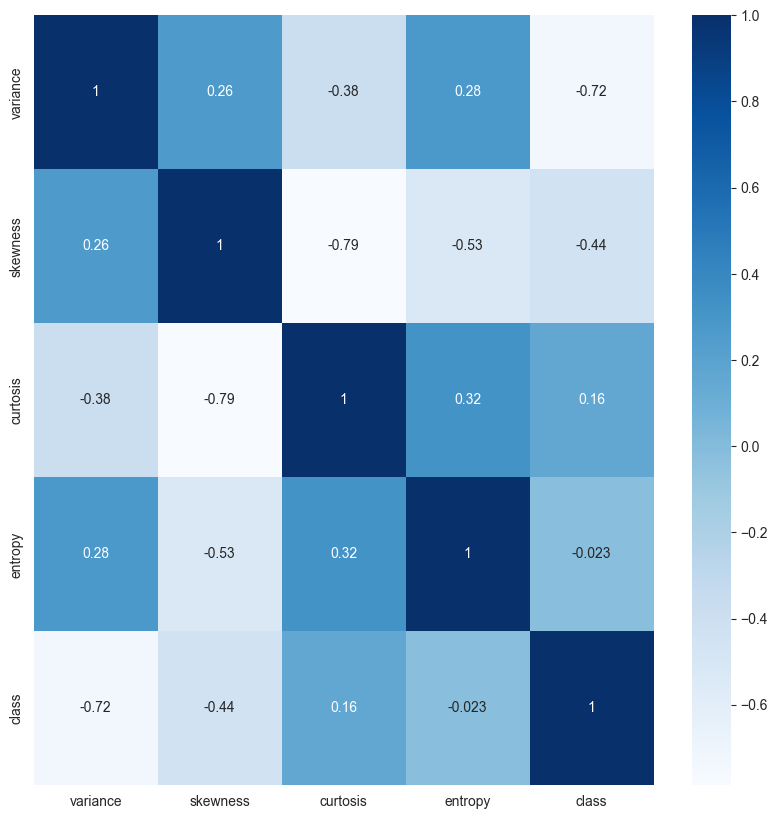

In [50]:
# plotting correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

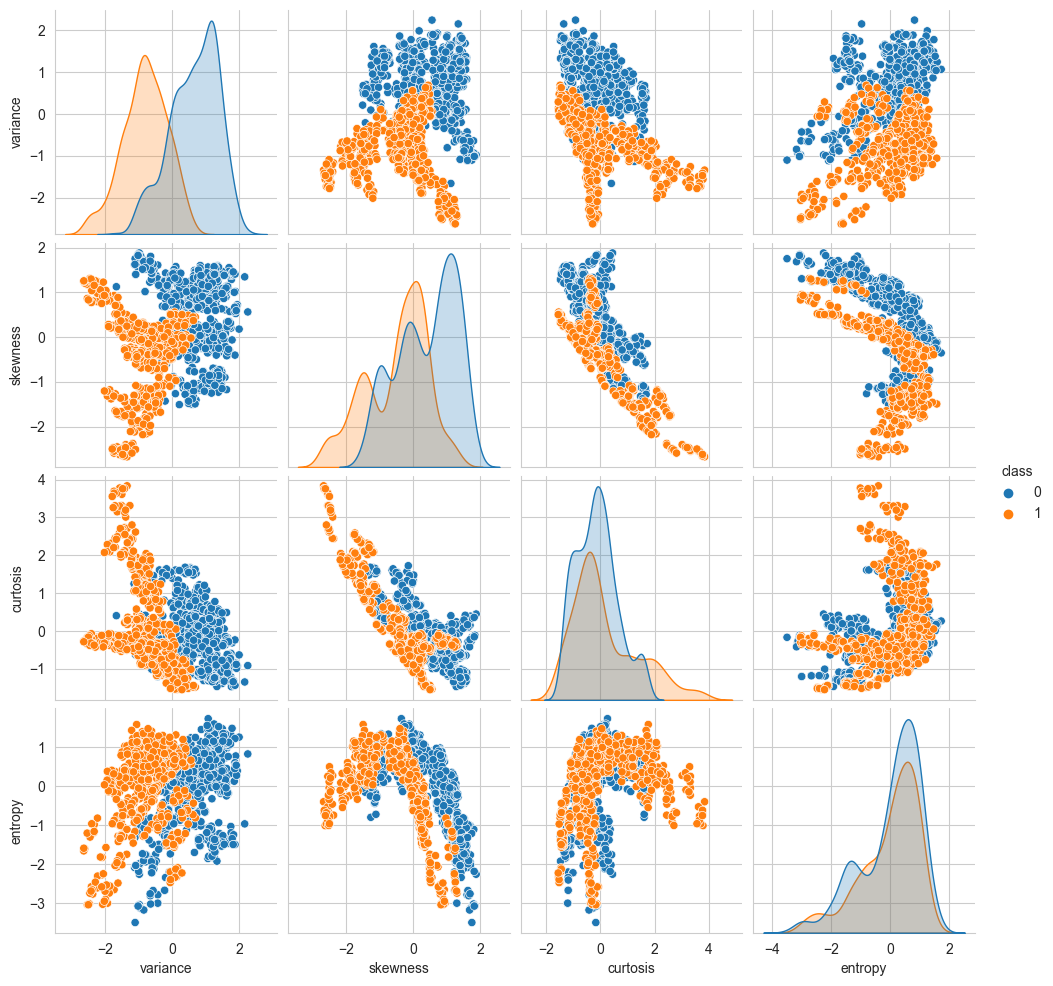

In [51]:
# plotting scatter plot between features using class as hue
sns.pairplot(df, hue='class')
plt.show()

In [52]:
# plotting 3d scatter plot to visualize the data and class as hue using plotly library
import plotly.express as px
fig = px.scatter_3d(df, x='variance', y='skewness', z='curtosis', color='class')
fig.show()

In [53]:
# splitting the data into train and test and validation as ratio 70:20:10
from sklearn.model_selection import train_test_split
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.33, random_state=42)

Q2. Train an SVM classifier using Sklearn library. Analyze the performance (classification
accuracy) for different values of ‘C’. (Choose at least 5 different values of C) [25 marks]

In [54]:
# Training the model using svm classifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model = SVC()
model.fit(X_train, y_train)

# evaluating the model using accuracy score for validation data and test data
y_pred_val = model.predict(X_val)
y_pred_test = model.predict(X_test)
print('Accuracy score for validation data:', accuracy_score(y_val, y_pred_val))
print('Accuracy score for test data:', accuracy_score(y_test, y_pred_test))

Accuracy score for validation data: 1.0
Accuracy score for test data: 1.0


In [55]:
# finding the best value of C
from sklearn.model_selection import GridSearchCV
params = {'C': [0.1, 1, 2, 3, 4]}
grid = GridSearchCV(SVC(), params, refit=True, verbose=3)
grid.fit(X_train, y_train)
print('Best value of C:', grid.best_params_['C'])

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END .............................C=0.1;, score=0.995 total time=   0.0s
[CV 2/5] END .............................C=0.1;, score=0.969 total time=   0.0s
[CV 3/5] END .............................C=0.1;, score=0.984 total time=   0.0s
[CV 4/5] END .............................C=0.1;, score=0.984 total time=   0.0s
[CV 5/5] END .............................C=0.1;, score=1.000 total time=   0.0s
[CV 1/5] END ...............................C=1;, score=1.000 total time=   0.0s
[CV 2/5] END ...............................C=1;, score=0.984 total time=   0.0s
[CV 3/5] END ...............................C=1;, score=0.995 total time=   0.0s
[CV 4/5] END ...............................C=1;, score=1.000 total time=   0.0s
[CV 5/5] END ...............................C=1;, score=1.000 total time=   0.0s
[CV 1/5] END ...............................C=2;, score=1.000 total time=   0.0s
[CV 2/5] END ...............................C=2;,

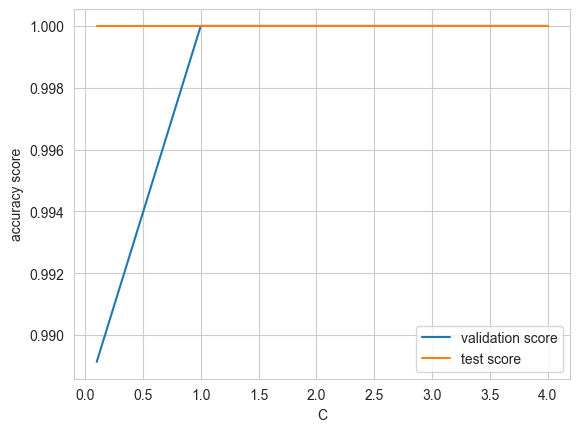

In [56]:
# storing accuracy score for validation data and test data for for all values of C and plotting them
val_scores = []
test_scores = []
for i in params['C']:
    model = SVC(C=i)
    model.fit(X_train, y_train)
    y_pred_val = model.predict(X_val)
    y_pred_test = model.predict(X_test)
    val_scores.append(accuracy_score(y_val, y_pred_val))
    test_scores.append(accuracy_score(y_test, y_pred_test))
plt.plot(params['C'], val_scores, label='validation score')
plt.plot(params['C'], test_scores, label='test score')
plt.xlabel('C')
plt.ylabel('accuracy score')
plt.legend()
plt.show()

 FROM ABOVE GRAPH WE CAN SEE THAT THE BEST VALUE OF C IS NEAR 1 WHERE THE TEST AND VALIDATION ACCURACY IS SATURATED AS WELL AS THE DIFFERENCE BETWEEN THEM IS MINIMUM.

In [64]:
X_train

,variance,skewness,curtosis,entropy
879,-0.352780,-0.086068,-0.655183,0.031928
783,0.014057,0.245129,-1.370334,-1.357670
605,0.222212,1.098679,-0.649426,-0.218662
1253,-1.754861,-2.472811,3.259651,-0.146004
497,-0.169525,-0.601007,1.642808,0.927146
...,...,...,...,...
1095,0.256979,0.339301,-1.381475,-1.273918
1130,-0.959112,-1.564598,1.523067,1.005956
1294,-2.628731,1.256326,-0.285876,-1.594071
860,-1.370377,0.130861,-0.286872,0.080589


In [66]:
# plotting the decision boundary for all values of C
X_train_plot = X_train[['variance', 'skewness']]
X_val_plot = X_val[['variance', 'skewness']]
X_test_plot = X_test[['variance', 'skewness']]
model1 = SVC(C=0.1)
model1.fit(X_train_plot, y_train)
model2 = SVC(C=1)
model2.fit(X_train_plot, y_train)
model3 = SVC(C=2)
model3.fit(X_train_plot, y_train)
model4 = SVC(C=3)
model4.fit(X_train_plot, y_train)
model5 = SVC(C=4)
model5.fit(X_train_plot, y_train)

SVC(C=4)

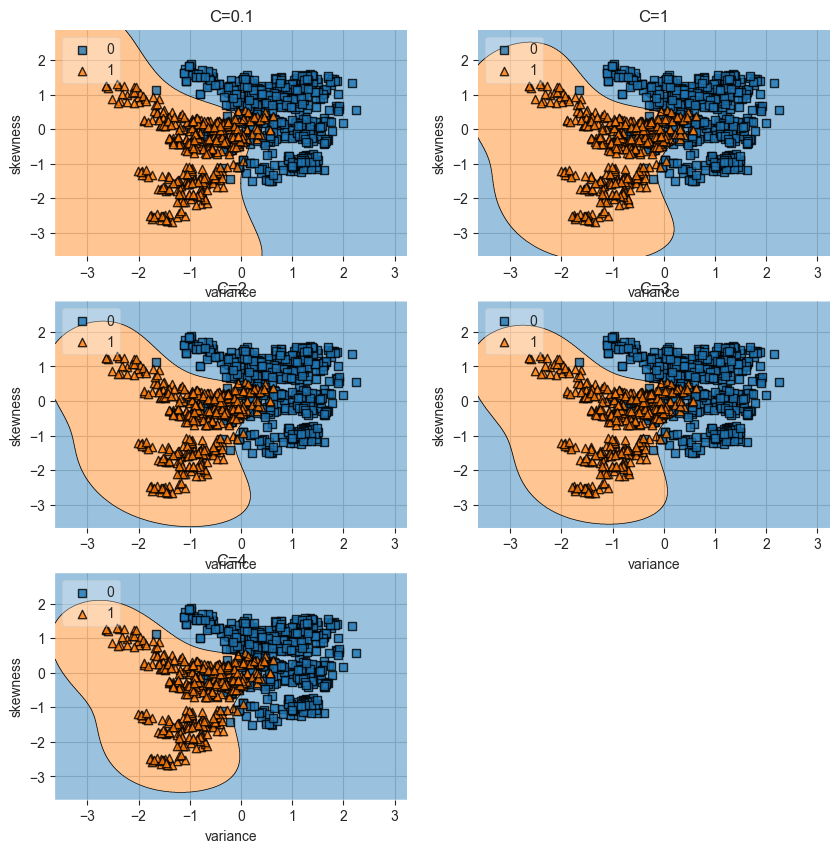

In [67]:
# plotting the decision boundary for all models using mlxtend library
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(10, 10))
plt.subplot(3, 2, 1)
plot_decision_regions(X_train_plot.values, y_train.values, clf=model1, legend=2)
plt.xlabel('variance')
plt.ylabel('skewness')
plt.title('C=0.1')
plt.subplot(3, 2, 2)
plot_decision_regions(X_train_plot.values, y_train.values, clf=model2, legend=2)
plt.xlabel('variance')
plt.ylabel('skewness')
plt.title('C=1')
plt.subplot(3, 2, 3)
plot_decision_regions(X_train_plot.values, y_train.values, clf=model3, legend=2)
plt.xlabel('variance')
plt.ylabel('skewness')
plt.title('C=2')
plt.subplot(3, 2, 4)
plot_decision_regions(X_train_plot.values, y_train.values, clf=model4, legend=2)
plt.xlabel('variance')
plt.ylabel('skewness')
plt.title('C=3')
plt.subplot(3, 2, 5)
plot_decision_regions(X_train_plot.values, y_train.values, clf=model5, legend=2)
plt.xlabel('variance')
plt.ylabel('skewness')
plt.title('C=4')
plt.show()

As we can see that as we increase the value of C the no of misclassified points decreases and the decision boundries more precisely classifies the points but model also becomes more complex and overfits the data.

Q3. Use various types of kernels(RBF, Linear, Quadratic etc) and train the SVM model using
the Sklearn library. Plot the decision boundary for different svm models trained. [25 marks]

In [60]:
# performing dimensionality reduction using lda
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_val_lda = lda.transform(X_val)
X_test_lda = lda.transform(X_test)

In [61]:
# printing explained variance ratio
print('Explained variance ratio:', lda.explained_variance_ratio_)

Explained variance ratio: [1.]


Since the lda is giving only 1 component so we can't use it for classification. As we will not be able to plot the decision boundry.

In [73]:
# training the model for different kernels like rbf, linear , quadratic
model_linear = SVC(kernel='linear')
model_linear.fit(X_train_plot,y_train)
model_rbf = SVC(kernel='rbf')
model_rbf.fit(X_train_plot,y_train)
model_quadratic = SVC(kernel='poly',degree=2)
model_quadratic.fit(X_train_plot,y_train)
model_poly = SVC(kernel='poly',degree=3)
model_poly.fit(X_train_plot,y_train)

SVC(kernel='poly')

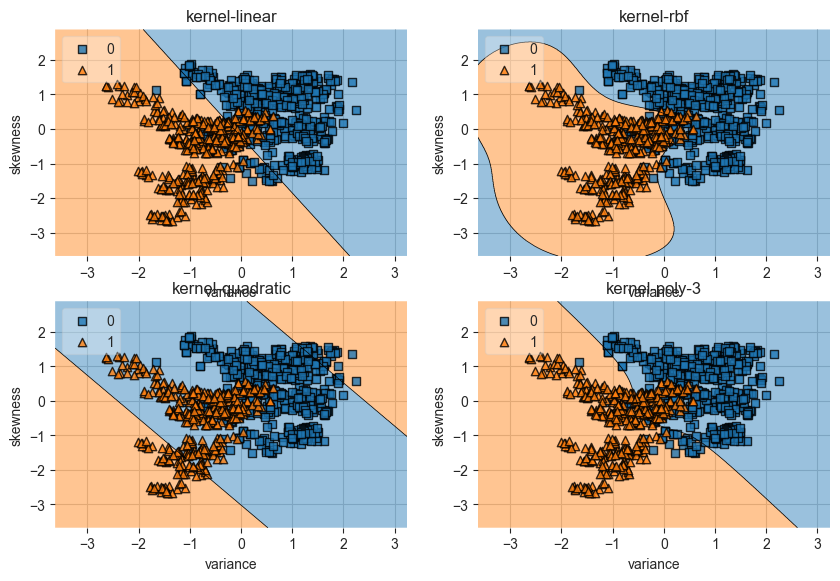

In [74]:
# plotting the decision boundary for all models using mlxtend library
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(10, 10))
plt.subplot(3, 2, 1)
plot_decision_regions(X_train_plot.values, y_train.values, clf=model_linear, legend=2)
plt.xlabel('variance')
plt.ylabel('skewness')
plt.title('kernel-linear')
plt.subplot(3, 2, 2)
plot_decision_regions(X_train_plot.values, y_train.values, clf=model_rbf, legend=2)
plt.xlabel('variance')
plt.ylabel('skewness')
plt.title('kernel-rbf')
plt.subplot(3, 2, 3)
plot_decision_regions(X_train_plot.values, y_train.values, clf=model_quadratic, legend=2)
plt.xlabel('variance')
plt.ylabel('skewness')
plt.title('kernel-quadratic')
plt.subplot(3, 2, 4)
plot_decision_regions(X_train_plot.values, y_train.values, clf=model_poly, legend=2)
plt.xlabel('variance')
plt.ylabel('skewness')
plt.title('kernel-poly-3')
plt.show()

As we see from the decision boundary plots that the dataset is not linear. So, linear kernel is not performing well. 
Whereas, the rbf kernel is performing well as it is able to classify the points properly. Because it is tightly fitting the dataset.
Also, quadratic kernel is not performing well as it is underfitting the dataset.
But 3 degree polynomial kernel is performing well as it is able to classify the points properly.It is able to go through the part where points of different classes are mixed together.